<a href="https://colab.research.google.com/github/lineality/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/GGA_133_v4_asnmt_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code! def bayes_theorem_applier

0.33221476510067116
0.9801000000000001
0.9997949506335922
0.9999979283737839
0.9999999790744397
0.9999999997886307
0.999999999997865
0.9999999999999785
0.9999999999999998
1.0


([0.33221476510067116,
  0.9801000000000001,
  0.9997949506335922,
  0.9999979283737839,
  0.9999999790744397,
  0.9999999997886307,
  0.999999999997865,
  0.9999999999999785,
  0.9999999999999998,
  1.0],)

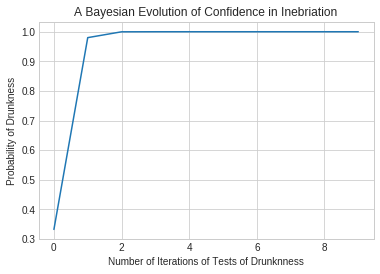

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#counter_list = [0,0,0,0,0,0,0,0,0,0]
prior_list_save = [0,0,0,0,0,0,0,0,0,0]


def bayes_theorum_drunk(prior, false_positive):
  #creating a list to store values
  prior_list = [0,0,0,0,0,0,0,0,0,0]
  #prior_list2 = []



  for i,k in enumerate(prior_list):
      
    # setting variables
    P_Drunk = prior #probability of being user: 0.005
    P_Drunk_and_Test_Positive = 1 - false_positive 
    # false_positive = false_positive =  0.01
    P_Sober_Not_Drunk = 1 - prior 

    #equation
    new_prior = (P_Drunk_and_Test_Positive  * P_Drunk) / ((P_Drunk_and_Test_Positive  * P_Drunk) + (false_positive * P_Sober_Not_Drunk)) 
    print(new_prior)

    #store values
    prior_list[i] = new_prior
    #counter_list[i] = K

    #for next recursive iteration, update prior
    prior = new_prior
    prior_list_save = prior_list

  fig = plt.figure()
  ax = plt.axes()
  
  plt.title("A Bayesian Evolution of Confidence in Inebriation")
  plt.xlabel("Number of Iterations of Tests of Drunknness")
  plt.ylabel("Probability of Drunkness"); 

  #x = np.linspace(0, 10, 1000)
  ax.plot(prior_list);

  return prior_list, 



bayes_theorum_drunk(.005, 0.01)

#Blurb on Frequentists and Bayesians: 

Frequentists are concerned with and focus on theoretical and past statistical probabilities, where it is easy to say 'total probability.' Bayesians are concerned with how changes in 'prior' knowledge continually evolve future predictions. 

Pic of conceptual difference(https://github.com/lineality/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Bayesians1.jpg)

In [0]:
#Importing libraries

import pandas as pd
import numpy as np 
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, t, ttest_1samp
import scipy.stats as stats
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

In [2]:
#loading file - this is the real data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-19 20:09:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2019-09-19 20:09:26 (449 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])


In [0]:
# cleaning: +NaN, string to int
df = df.replace({'?':np.NaN, 'n':0, 'y':1})

In [6]:
df.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [0]:
#use "filtering" to create two new party based df (so much for nonpartisan dataframes...a sad day)
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
mean, variance, stdev = stats.bayes_mvs(dem['water-project'].dropna(),alpha=.95)

In [12]:
mean

Mean(statistic=0.502092050209205, minmax=(0.43824514095228484, 0.5659389594661252))

In [13]:
variance

Variance(statistic=0.25317353379192964, minmax=(0.2114086380840171, 0.30304303169474467))

In [14]:
stdev

Std_dev(statistic=0.5026307974956246, minmax=(0.45979195086910457, 0.5504934438253962))

To compare this with data from a previous approach, the resulting means are comparable: .50209

In [0]:
#  calculate confidence interval, not based on P

def conf_int(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(margin_of_error)
  return (mean,  mean - margin_of_error, mean + margin_of_error)

In [23]:
conf_int(dem['water-project'].dropna())

0.06384690925692016


(0.502092050209205, 0.43824514095228484, 0.5659389594661252)

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)